In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [2]:
ax = pd.read_csv("pima-indians-diabetes_label.csv")
df = pd.read_csv("pima-indians-diabetes_label.csv")

In [3]:
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2    pres   768 non-null    int64  
 3   skin    768 non-null    int64  
 4    test   768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7    age    768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isnull().sum()

preg     0
plas     0
 pres    0
skin     0
 test    0
mass     0
pedi     0
 age     0
class    0
dtype: int64

In [6]:
dups = df.duplicated()
dups.sum()

0

In [7]:
df.groupby(['class']).count()

,preg,plas,pres,skin,test,mass,pedi,age
class,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


In [8]:
df['class'].value_counts(normalize = True)

0    0.651042
1    0.348958
Name: class, dtype: float64

In [9]:
df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


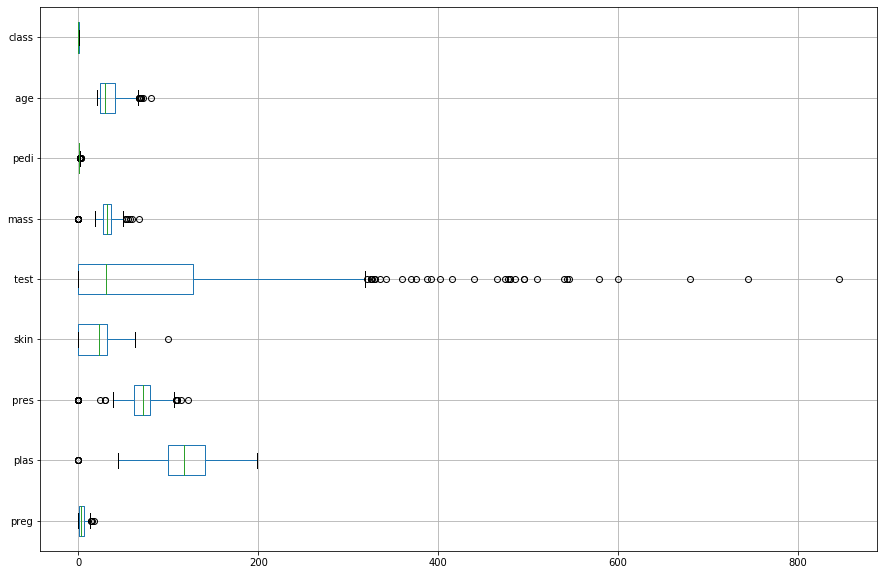

In [10]:
plt.figure(figsize=(15,10))
df.boxplot(vert = 0)

In [11]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [12]:
for column in df.columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

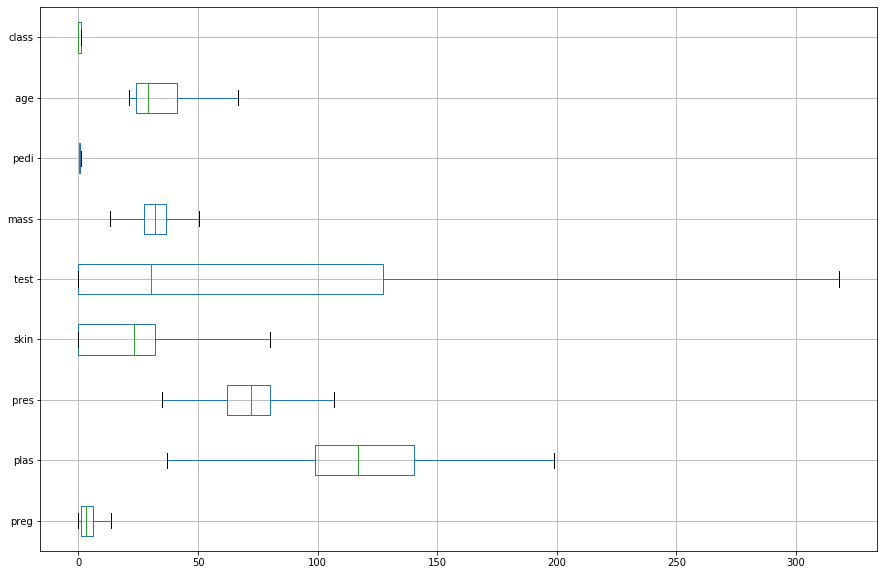

In [13]:
plt.figure(figsize=(15,10))
df.boxplot(vert = 0)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x = df.drop("class", axis =1)

In [16]:
y = df["class"]

In [17]:
x.head()

,preg,plas,pres,skin,test,mass,pedi,age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0


In [18]:
y.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: class, dtype: float64

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y ,test_size = 0.30, random_state = 1)

In [20]:
lrmodel = LogisticRegression()
lrmodel.fit(x_train, y_train)

C:\Users\Krishna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
lrmodel.score(x_train, y_train)

0.776536312849162

In [22]:
lrmodel.score(x_test, y_test)

0.7922077922077922

In [23]:
from sklearn.metrics import confusion_matrix, classification_report

In [24]:
y_train_predict = lrmodel.predict(x_train)

In [25]:
confusion_matrix(y_train, y_train_predict)

array([[315,  39],
       [ 81, 102]], dtype=int64)

In [41]:
y_test_predict = lrmodel.predict(x_test)

In [42]:
confusion_matrix(y_test, y_test_predict)

array([[133,  13],
       [ 35,  50]], dtype=int64)

In [26]:
lrmodel.intercept_

array([-8.04305184])

In [27]:
prediction_logistic = lrmodel.predict(x_train)
prediction_logistic

array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [28]:
prediction_logistic1 = lrmodel.predict(x_test)
prediction_logistic1

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0.

In [29]:
a = prediction_logistic
b = prediction_logistic1

In [30]:
c = np.concatenate((a, b))

In [31]:
c

array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [32]:
ax['Logistic_predictions'] = c

In [40]:
ax.to_csv("test.csv")

In [33]:
ax.head()

,preg,plas,pres,skin,test,mass,pedi,age,class,Logistic_predictions
0,6,148,72,35,0,33.6,0.627,50,1,1.0
1,1,85,66,29,0,26.6,0.351,31,0,0.0
2,8,183,64,0,0,23.3,0.672,32,1,0.0
3,1,89,66,23,94,28.1,0.167,21,0,0.0
4,0,137,40,35,168,43.1,2.288,33,1,0.0


In [34]:
df.head(25)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6.0,148.0,72.0,35.0,0.000,33.60,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.000,26.60,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.000,23.30,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.000,28.10,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.000,43.10,1.200,33.0,1.0
5,5.0,116.0,74.0,0.0,0.000,25.60,0.201,30.0,0.0
6,3.0,78.0,50.0,32.0,88.000,31.00,0.248,26.0,1.0
7,10.0,115.0,35.0,0.0,0.000,35.30,0.134,29.0,0.0
8,2.0,197.0,70.0,45.0,318.125,30.50,0.158,53.0,1.0
9,8.0,125.0,96.0,0.0,0.000,13.35,0.232,54.0,1.0


In [35]:
x = pd.read_csv("validate_pima-indians-diabetes_label.csv")

In [36]:
pred_class_logistic = lrmodel.predict(x)
pred_class_logistic

array([1., 0.])

In [37]:
pred_class_logistic_prob = lrmodel.predict_proba(x)
pred_class_logistic_prob

array([[0.30834063, 0.69165937],
       [0.95099153, 0.04900847]])

In [38]:
x['Logistic_prediction_class'] = pred_class_logistic

In [39]:
x

,preg,plas,pres,skin,test,mass,pedi,age,Logistic_prediction_class
0,6,148,72,35,0,33.6,0.627,50,1.0
1,1,85,66,29,0,26.6,0.351,31,0.0
